In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
zoo_dir = "/content/drive/MyDrive/dataset ml/zoo.csv"
class_dir = "/content/drive/MyDrive/dataset ml/class.csv"

data_zoo = pd.read_csv(zoo_dir)
data_class = pd.read_csv(class_dir)

In [5]:
display(data_zoo.head())
display(data_class)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [6]:
class_types = list(data_class['Class_Type'])
class_types

['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

In [7]:
class_map = {}
for i in range(data_class.shape[0]):        
    class_map[data_class['Class_Number'].iloc[i]] = data_class['Class_Type'].iloc[i]
    
class_map

{1: 'Mammal',
 2: 'Bird',
 3: 'Reptile',
 4: 'Fish',
 5: 'Amphibian',
 6: 'Bug',
 7: 'Invertebrate'}

In [9]:
print(f"Total animals in zoo data is {len(data_zoo['animal_name'].unique())}")
print(f"Total animal in class data is {data_class['Number_Of_Animal_Species_In_Class'].sum()}")

Total animals in zoo data is 100
Total animal in class data is 101


In [10]:
data = pd.merge(data_zoo, data_class, how='left', left_on='class_type', right_on='Class_Number')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [11]:
data.drop(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Animal_Names'], axis=1, inplace=True)
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


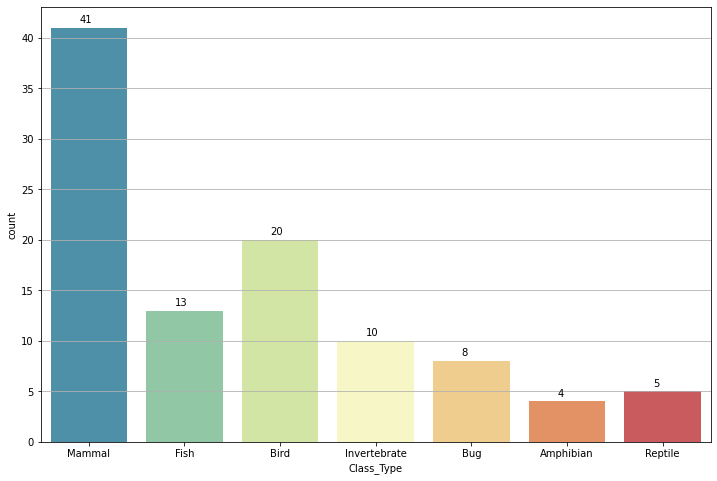

In [12]:
plt.figure(figsize = (12,8))
plt.grid(True)
ax = sns.countplot(x='Class_Type', data=data, palette='Spectral_r')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.5))

In [14]:
animal_type = {}
animal_category = data.Class_Type.unique()

for category in animal_category:
    animal_type[category] = data[data['Class_Type']==category]


In [16]:
SPLIT = 0.85
train = pd.DataFrame() 
test = pd.DataFrame() 
for category_name in animal_type:
    m = int(animal_type[category_name].shape[0] * SPLIT)
    train = pd.concat([train, animal_type[category_name].iloc[: m, :]])
    test = pd.concat([test, animal_type[category_name].iloc[m:, :]])


train = train.sample(frac=1)
test = test.sample(frac=1)

In [17]:
train.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
32,gorilla,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1,1,Mammal
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,Mammal
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5,Amphibian
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7,Invertebrate
55,oryx,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal


In [18]:
X_train = train.iloc[:,1:-2] 
y_train = train.iloc[:, -2] 
X_test = test.iloc[:, 1:-2]
y_test = test.iloc[:, -2]

In [19]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [20]:
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred)}")
print(metrics.classification_report(y_test, y_pred))

Accuracy = 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



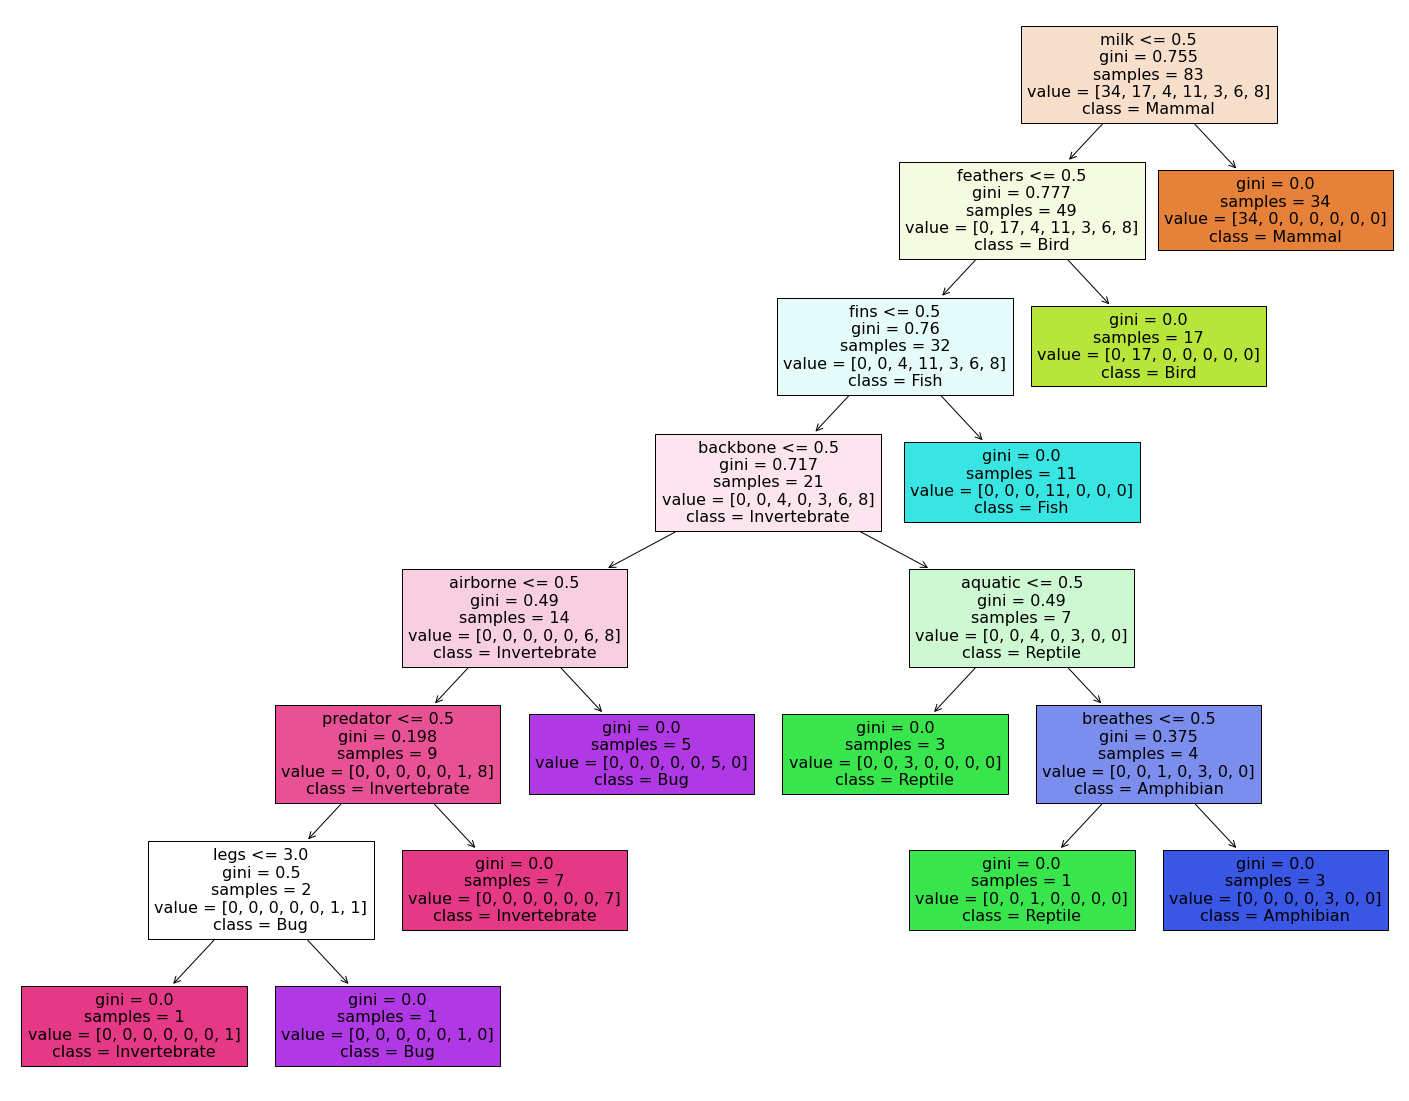

In [21]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, feature_names=X_train.columns,  
                class_names=class_types, filled=True)